In [1]:
import bargo.engine as engine

import os
import numpy as np
from scipy.special import jn, jn_zeros
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype']  = 42
matplotlib.rcParams['font.family'] = 'serif'

from sklearn.metrics import r2_score

import pickle
from tqdm import tqdm

2024-03-27 19:44:50.434370: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
run = 'run13'
N = 40
metric_path = f'data/{run}/N{N}'
h = 2 / (N - 1)

with open(os.path.join(metric_path, 'mask.pkl'), 'rb') as file:
    mask = pickle.load(file)
with open(os.path.join(metric_path, 'metricized_grid.pkl'), 'rb') as file:
    Y, Js, dJs = pickle.load(file)

Gs_inv, Ws = engine.Geometry.cast_metric(Js, dJs)

In [3]:
# def f(x, y):
#     if x**2 + y**2 < 0.2**2:
#         return (0.2**2 - (x**2 + y**2)) / 0.2**2 
#     else: return 0

def f(x, y):
    return 1

# def f(y1, y2):
#     y1 /= 1.3
#     y2 /= 1.3
#     return np.sin(np.pi * y1 / (1 + 0.2 * (y2 ** 2 - 1))) * np.sin(np.pi * y2)

# def f(y1, y2):
#     return 0

# def u0(y1, y2):
#     y1 /= 1.3
#     y2 /= 1.3
#     return ((y1 / (1 + 0.2 * (y2 ** 2 - 1)))**2 - 1) * (y2 ** 2 - 1)

def u0(y1, y2):
    y1 /= 1.3
    y2 /= 1.3
    return np.sin(np.pi * y1 / (1 + 0.2 * (y2 ** 2 - 1))) * np.sin(np.pi * y2)
    
solver = engine.FDSolver(Y, mask, Gs_inv, Ws, h, f, [1])

In [8]:
A = solver.get_fd_matrix(solver.get_laplacian_stencil)

In [20]:
# def u0(x, y):
#     if x**2 + y**2 < 0.5**2:
#         return 0.5**2 - (x**2 + y**2)
#     else: return 0
un = [solver.vectorize_function(u0)]

In [21]:
b = solver.vectorize_function(f)

(<Figure size 700x700 with 2 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

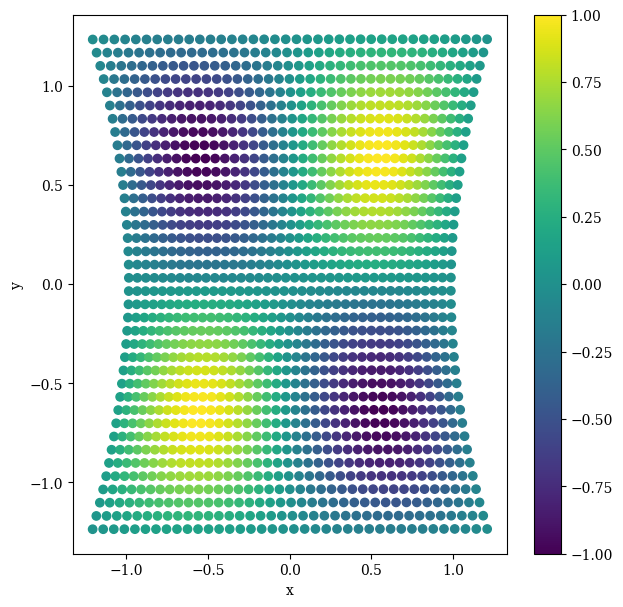

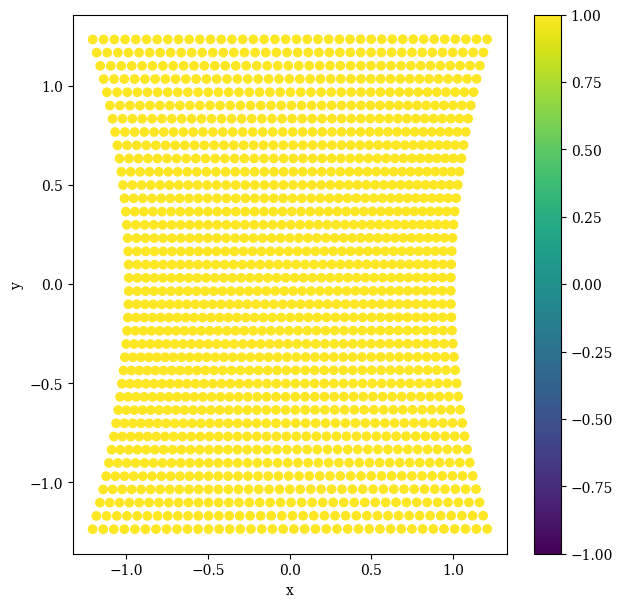

In [22]:
solver.plot(un[0], zlim=(-1, 1))
solver.plot(b, zlim=(-1, 1))

In [23]:
np.linalg.norm(un[0])

19.50793061089444

In [24]:
k = 1
dt = 1

while np.linalg.norm(A @ un[0] * k * dt + b * dt) / np.linalg.norm(un[0]) > 1e-3:
    dt /= 10
print(k, dt)

1 1e-05


In [25]:
n_inter = int(0.5 / dt)

In [28]:
# un = [un]
for _ in tqdm(range(50000)):
    un_step = un[-1]
    un.append(un_step + A @ un_step * k * dt + b * dt)

100%|██████████| 50000/50000 [00:18<00:00, 2704.29it/s]


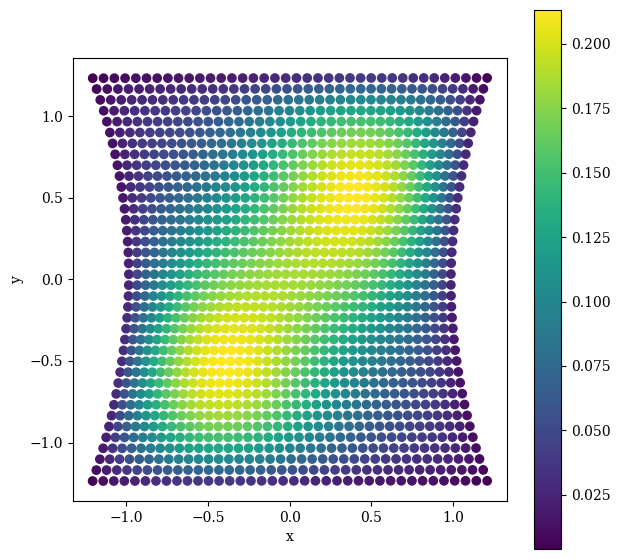

In [36]:
fig, ax = solver.plot(un[20000], 'heatmap')
ax.set_aspect('equal')

In [30]:
Ainv = np.linalg.inv(A)

In [31]:
ulim = - Ainv @ b

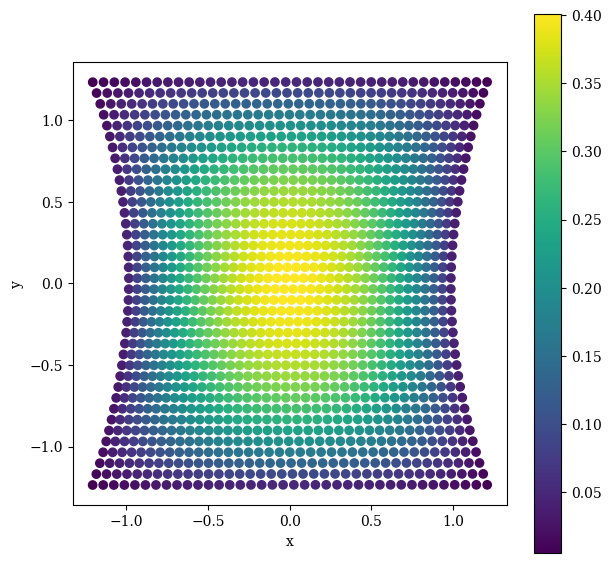

In [32]:
fig, ax = solver.plot(ulim)
ax.set_aspect('equal')

In [15]:
for i, un_step in tqdm(enumerate(un[::500])):
    solver.plot(un_step, '3d', (-1, 1)) 
    plt.savefig(f'data/run13/N40/images/{i}.png', dpi=100, facecolor='white')
    plt.close()

21it [00:03,  5.93it/s]
